In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import KFold, cross_val_score
import sklearn

## 1. Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям

In [2]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


##  2. Преобразуйте признак Sex в числовой: значение F должно перейти в-1, I в 0, M в 1.

In [3]:
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


##  3. Разделите содержимое файлов на признаки и целевую переменную.
 В последнем столбце записана целевая переменная, в остальных признаки

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

 ## 4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (random_state=1). 
 Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1"и "shuffle=True" при создании генератора кросс
валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [5]:
cross_val = KFold(n_splits=5, shuffle=True, random_state=1)
n_forest = range(1, 51)
result = []
# ans, k_best = 0, 0
for k in n_forest:
    model = RFR(n_estimators=k, random_state=1, n_jobs=-1)
    res = cross_val_score(model, X, y, cv=cross_val, scoring='r2').mean()
    result.append((res, k))

 ## 5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. 
 Это количество и будет ответом на задание.

In [8]:
for res, n in result:
    if res > 0.52:
        print(n)
        break


21


## 6. Обратите внимание на изменение качества по мере роста числа деревьев. 
Ухудшается ли оно?

Ухудшается, например, для i=9: result[9][0]=0.49541, а result[10][0]=0.49441, разница: 0.00100


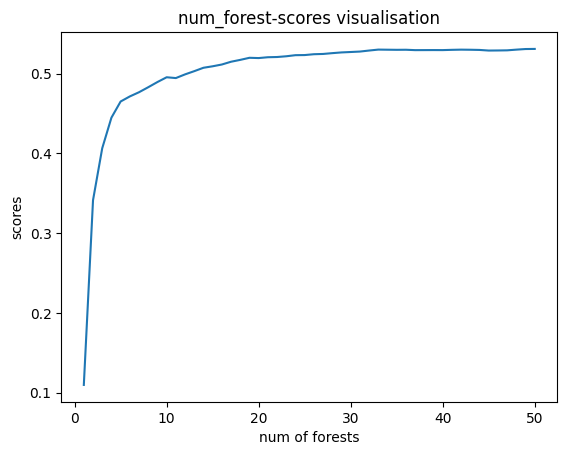

In [9]:
import matplotlib.pyplot as plt
import numpy as np

result = np.array(result)
plt.plot(n_forest, result[:, 0])
plt.xlabel('num of forests')
plt.ylabel('scores')
plt.title('num_forest-scores visualisation')

# проверим точно
for i in range(50):
    if result[i, 0] > result[i + 1, 0]:
        print(f'Ухудшается, например, для i={i}: result[{i}][0]={result[i, 0]:.5f}, а result[{i+1}][0]={result[i + 1, 0]:.5f}, разница: {result[i, 0] - result[i+1, 0]:.5f}')
        break
else:
    print('Не ухудшается')